![example](images/director_shot.jpeg)

# Project Title

**Authors:** Rachel Fein
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This analysis and data modeling was preformed with the intent to give recommendation on basic key characteristics a movie should have to be sucessful. Sucess in this analysis is based on net profit (production budget - gross worldwide profit). The investigation dove into the runtime, release month, and production budget of the most and lease sucessful movies of all time. The investigation led to three recommendations: 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Microsoft want to make a movie that has the highest chances of success. The rate of sucess will be evaluated by the 
ROI (rate of investment) or NET profit, a formula of gross profit subtracted by budget. Specific atrubutes of the 
Movies with the highest ROI were analysised to give Microsoft the understanding of what common qualities at top
producing movie has. 

Top producing movies' runtime, release date, and budget were analysis. These three aspects were picked becuase 
they have shown to have a great impact on a movies' sucess and will help Microsoft develop a movie that will land 
in with the top. 

Finding and choosing the defining characteristics of a movie that help make it sucessful will give microsoft the 
best chance at sucess.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.

The data used for this project was from IMDb and The Numbers, both are a reptuable online database of movie information. The data from these sources worked well in my analysis since most movies located in the IMDb database was also located in the TN database, this allowed for the databases to be combined when needed for analysis. The IMDb data set used was called "imdb title basics" it had 5782 rows and 6 columns. The columns were release date, movie production_budget, domestic_gross, worldwide_gross. The TN dataframe was called "tn movie budgets" and contained 146144 rows and 4 colums; primary_title, original_title, start_year,  runtime_minutes, genres.  Although most movies located in the smaller IMDb dataset were also located in the larger TN dataset, they vast difference of the amount of rows between the two was a limitation for the analysis. 

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

Where did the data come from, and how do they relate to the data analysis questions?

To answer the data analysis question I need to find the hight ROI and to find that I need the 
total costs (budget and gross rev). Once I have the movies with the highest ROI I will look
into their genres, time of year released, and etc. The data I used was found in
imdb.title.basics.csv, tn.movie_budgets.csv, and bom.movie_gross.csv

The target variable is the titles with the highest ROI and those titles characteristics

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import data needed for analysis after unzipping data using gzip -d filename.gz
df_imdb = pd.read_csv('data/zippedData/imdb.title.basics.csv')
df_tn = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [3]:
# find out what the data file consists. By using .info we can see where there is missing data and what the data types
# are.  
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# .info shows that there is data missing for runtime_minuites which is one of the features I will be analysising
# I will need to decide what is most appropriate to do about the null data.
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
# We see that out of 146,144 rows there are only 136,071 unique movie titles. 
df_imdb['primary_title'].nunique()

136071

## Data Preparation

Describe and justify the process for preparing the data for analysis.

- turned data from object to int
- adjust for inflation
- combined tables
- sorted values by net profit
- groupby runtime and then took average 
- groupby release month
- reset axis for readability
- renamed columns for readability 
- dropped data that didnt have runtime

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:

# Put release date in datetime format so I can extract the year & month which will be needed for 
# the inflation adjustment and release month analysis
df_tn['release_date']= pd.to_datetime(df_tn['release_date'])
df_tn['release_year'] = pd.DatetimeIndex(df_tn['release_date']).year
df_tn['release_month'] = pd.DatetimeIndex(df_tn['release_date']).month
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12


In [7]:
# The columns with money values must be changed from objects to integers to calculate net profit and for the analysis 
# of budget
df_tn[df_tn.columns[3:6]] = df_tn[df_tn.columns[3:6]].replace('[\$,]', '', regex=True).astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 361.5+ KB


In [8]:
# Adjust production_budget & worldwide_gross for inflation so that that the movies can be evaluated fairly
# cpi is a python library that is widely used to account for inflation of the dollar. 
# cpi.update insures we have the most up to date data the library holds

import cpi
cpi.update()

In [9]:
# A lambda function is used to account for inflation for movies made before 2019. Only the movies released before 2019
# are adjusted, this is because the cpi library does not have inflation rate for 2020 or 2021 yet, which is expected 
# and will not negatively impact the analysis

# Since movies released in 2019 or later arnt adjusted I used an else statement to place the orginal value in with
# the adjust value columns so I will not have missing data for movies released after 2019 

df_tn["adjusted_production_budget"] = df_tn.apply(lambda x: cpi.inflate(x["production_budget"], x["release_year"]) 
                                                if (x["release_year"] < 2019) else x["production_budget"], axis=1) 
df_tn["adjusted_worldwide_gross"] = df_tn.apply(lambda x: cpi.inflate(x["worldwide_gross"], x["release_year"]) 
                                                if (x["release_year"] < 2019) else x["worldwide_gross"], axis=1) 
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,5.127072e+08,3.349300e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,4.724294e+08,1.203123e+09
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,3.500000e+08,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,3.609991e+08,1.532023e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,3.347058e+08,1.390266e+09


In [10]:
# calculated and created a column for net profit (production budget - gross worldwide profit)

df_net_profit = df_tn.assign(net_profit = lambda x: df_tn['worldwide_gross'] 
                                    - df_tn['production_budget'])
df_net_profit.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,5.127072e+08,3.349300e+09,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,4.724294e+08,1.203123e+09,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,3.500000e+08,1.497624e+08,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,3.609991e+08,1.532023e+09,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,3.347058e+08,1.390266e+09,999721747


In [11]:
# Normalize the column names and dropped unnecessary columns for my analysis
# doing such will make the data easier to work & more readable

df_net_profit.drop(columns = ['id', 'production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True )
df_net_profit.head()

In [13]:
# EDIT move to bellow sorting code
# The data in df_net_profit will also be used for analysis of the release month. 
# The release_month is grouped by month and the mean was calculated for the net_profit for all rows in each month.
# below shows mean by month for the 50 worst profiting movies in the dataframe

mean_profit_by_month = df_net_profit.tail(50).groupby("release_month").net_profit.agg(['count', 'mean'])
mean_profit_by_month.head(14)

,count,mean
release_month,,
1,4,3.054350e+04
2,1,2.034928e+06
3,3,2.462007e+05
4,9,9.479567e+04
5,3,1.554367e+04
6,3,1.504342e+07
7,4,1.455662e+05
8,4,1.058378e+06
9,3,1.789670e+05


In [14]:
# below shows mean by month for the 50 best profiting movies in the dataframe
mean_profit_by_month2 = df_net_profit.head(50).groupby("release_month").net_profit.agg(['count', 'mean'])
mean_profit_by_month2.head(14)

,count,mean
release_month,,
2,1,1.148258e+09
3,2,3.126392e+08
4,2,1.366490e+09
5,15,5.754411e+08
6,11,6.411709e+08
7,5,5.717522e+08
11,4,4.059339e+08
12,10,1.063442e+09


In [15]:
# runtime data is located in df_imdb. I merged the runtime column to the df_net_profit table
# this new dataframe will only be used for data modeling of runtime as rows will get dropped doing an inner merge 
# This is because in a inner merger only movie titles/rows in both dataframes will remain once merged

# first make columns in both dataframes have same name for movie title
# movie_title is also a better name and helps with readablilty

df_net_profit.rename(columns={'movie': 'movie_title'}, inplace = True)
df_imdb.rename(columns={'primary_title': 'movie_title'}, inplace = True)
df_imdb.head()

,tconst,movie_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
# combine and drop columns that I dont need for data analysis of runtime
df_combined = df_net_profit.merge(df_imdb, on='movie_title', how= 'inner')
df_combined.drop(columns = ['tconst', 'original_title', 'start_year'], inplace=True )
df_combined.head()

,release_date,movie_title,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit,runtime_minutes,genres
0,2009-12-18,Avatar,2009,12,5.127072e+08,3.349300e+09,2351345279,93.0,Horror
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,2011,5,4.724294e+08,1.203123e+09,635063875,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,2019,6,3.500000e+08,1.497624e+08,-200237650,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,2015,5,3.609991e+08,1.532023e+09,1072413963,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,2018,4,3.092040e+08,2.110971e+09,1748134200,149.0,"Action,Adventure,Sci-Fi"


In [17]:
# we see that there are rows that are missing runtimes, this is because df_imdb didnt have runtimes for all rows in
# the dataframe
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                3815 non-null   datetime64[ns]
 1   movie_title                 3815 non-null   object        
 2   release_year                3815 non-null   int64         
 3   release_month               3815 non-null   int64         
 4   adjusted_production_budget  3815 non-null   float64       
 5   adjusted_worldwide_gross    3815 non-null   float64       
 6   net_profit                  3815 non-null   int64         
 7   runtime_minutes             3328 non-null   float64       
 8   genres                      3743 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 298.0+ KB


In [18]:
# I decided to drop the rows with no runtime data since the df_combined dataframe will only be used for 
# runtime analysis and will not have a negative impact on any other analysis in this project. 
df_combined.dropna(subset=['runtime_minutes'], inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   release_date                3328 non-null   datetime64[ns]
 1   movie_title                 3328 non-null   object        
 2   release_year                3328 non-null   int64         
 3   release_month               3328 non-null   int64         
 4   adjusted_production_budget  3328 non-null   float64       
 5   adjusted_worldwide_gross    3328 non-null   float64       
 6   net_profit                  3328 non-null   int64         
 7   runtime_minutes             3328 non-null   float64       
 8   genres                      3309 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 260.0+ KB


In [19]:
# we have repeating movie title rows with varing runtimes. This is becuase the df_imdb data
# had multiple movie title rows for the same title. I grouped by runtimes and then took the 
# mean and set the runtime as the mean value of all rows with the same movie title.
df_mean_runtime = df_combined.groupby(['movie_title', 'runtime_minutes'], sort=False).mean()
df_mean_runtime.head(10)

,,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
movie_title,runtime_minutes,,,,,
Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,136.0,2011.0,5.0,4.724294e+08,1.203123e+09,6.350639e+08
Dark Phoenix,113.0,2019.0,6.0,3.500000e+08,1.497624e+08,-2.002376e+08
Avengers: Age of Ultron,141.0,2015.0,5.0,3.609991e+08,1.532023e+09,1.072414e+09
Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09
Justice League,120.0,2017.0,11.0,3.167563e+08,6.925826e+08,3.559452e+08
Spectre,148.0,2015.0,11.0,3.275854e+08,9.605031e+08,5.796209e+08
The Dark Knight Rises,164.0,2012.0,7.0,3.099951e+08,1.222439e+09,8.094391e+08
Solo: A Star Wars Story,135.0,2018.0,5.0,2.834370e+08,4.052133e+08,1.181513e+08


In [20]:
# I reset the indext for readability
df_mean_runtime.reset_index(drop=False, inplace=True)
df_mean_runtime.head()

,movie_title,runtime_minutes,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,136.0,2011.0,5.0,4.724294e+08,1.203123e+09,6.350639e+08
2,Dark Phoenix,113.0,2019.0,6.0,3.500000e+08,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,141.0,2015.0,5.0,3.609991e+08,1.532023e+09,1.072414e+09
4,Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09


In [21]:
# Sort dataframes I will be using for data modeling by net_profit
df_mean_runtime.sort_values(['net_profit'], inplace = True, ascending = False)
df_mean_runtime.head()

,movie_title,runtime_minutes,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,Avatar,93.0,2009.0,12.0,5.127072e+08,3.349300e+09,2.351345e+09
32,Titanic,115.0,1997.0,12.0,3.225059e+08,3.560801e+09,2.008208e+09
4,Avengers: Infinity War,149.0,2018.0,4.0,3.092040e+08,2.110971e+09,1.748134e+09
24,Jurassic World,124.0,2015.0,6.0,2.347695e+08,1.800469e+09,1.433855e+09
52,Furious 7,137.0,2015.0,4.0,2.074707e+08,1.658371e+09,1.328723e+09


In [22]:
df_net_profit.sort_values(['net_profit'], inplace = True, ascending = False)
df_net_profit.head()

,release_date,movie_title,release_year,release_month,adjusted_production_budget,adjusted_worldwide_gross,net_profit
0,2009-12-18,Avatar,2009,12,5.127072e+08,3.349300e+09,2351345279
42,1997-12-19,Titanic,1997,12,3.225059e+08,3.560801e+09,2008208395
6,2018-04-27,Avengers: Infinity War,2018,4,3.092040e+08,2.110971e+09,1748134200
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,2015,12,3.341371e+08,2.242116e+09,1747311220
33,2015-06-12,Jurassic World,2015,6,2.347695e+08,1.800469e+09,1433854864


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

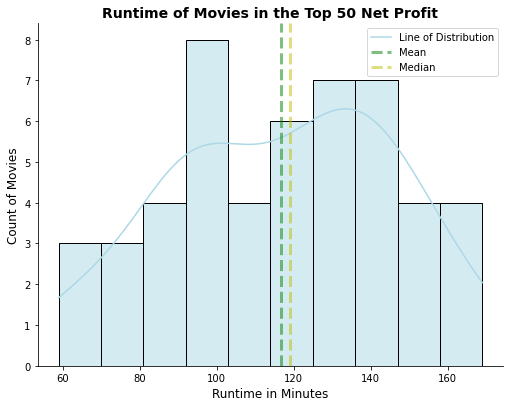

In [32]:
# Data model to determine the best recommended runtime
# Set data model to just include top 50 producing movies since I only want to look at the most sucessful
# movies to help answer business question
variable = df_mean_runtime.head(50)

# Use a displot to look at the distribution of runtimes
# include a kde line, which shows the density of the data distribution and helps visualize and locate where the most
# sucessful movies runtimes are
sns.displot(data=variable, x="runtime_minutes",  kde=True, legend=True, 
            height=5.5, aspect=1.3, color='lightblue', bins=10)
# Label axis & title
plt.xlabel("Runtime in Minutes", size=12)
plt.ylabel("Count of Movies", size=12)
plt.title("Runtime of Movies in the Top 50 Net Profit", weight='bold', size=14)

# add a mean and median line to the plot, the mean and median value is what I will recommend the movie runtime to be
plt.axvline(x=variable.runtime_minutes.mean(), ls='--', linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=variable.runtime_minutes.median(), ls='--', linewidth=3, color='y', label="median", alpha=0.5)
plt.legend(['Line of Distribution', "Mean", "Median"])

# Plot shows that even though the highest number of sucessful movies lasted between 90-100 mins, this is greater range
# of sucess above 110 minutes. This is shown in the kde, mean, and median

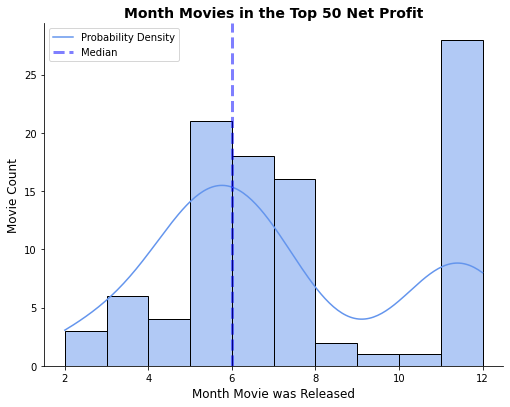

In [26]:
# Data model to determine the best recommended release month
# Set data model to just include top 50 producing movies since I only want to look at the most sucessful
# movies to help answer business question
variable2 = df_net_profit.head(100)

# include a kde line, which shows the density of the data distribution and helps visualize and locate where the most
# sucessful movies' release months are
sns.displot(data=variable2, x="release_month", legend=True, 
            height=5.5, aspect=1.3, color='cornflowerblue',  kde=True, bins=10)

# Label axis & title
plt.xlabel("Month Movie was Released", size=12)
plt.ylabel("Movie Count", size=12)
plt.title("Month Movies in the Top 50 Net Profit", weight='bold', size=14)

# add a median line to the plot, median value is what I will recommend the movie runtime to be
plt.axvline(x=variable2.release_month.median(), ls='--', linewidth=3, color='b', label="median", alpha=0.5)
plt.legend(['Probability Density', "Median"])

# Shows that even though the top producing movies were released in december overall there
# are more movies that do better in spring and summer

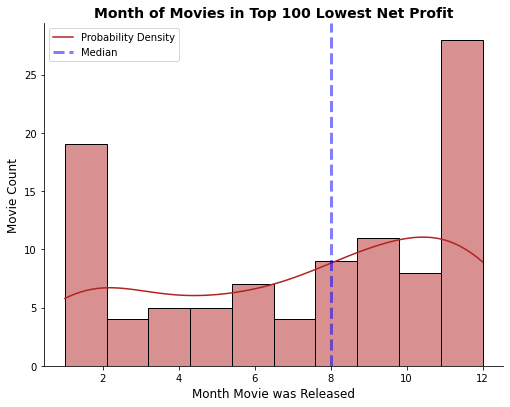

In [27]:
# Data model to determine the WORST release month
# It is important to also view the worst release month because it better narrow downs when to release the move and
# helps answer business question
variable3 = df_net_profit.tail(100)

# include a kde line, which shows the density of the data distribution and helps visualize and locate what the least
# sucessful movies' release months are
sns.displot(data=variable3, x="release_month", kde=True, legend=True, 
            height=5.5, aspect=1.3, color='firebrick', bins=10)
plt.xlabel("Month Movie was Released", size=12)
plt.ylabel("Movie Count", size=12)
plt.title("Month of Movies in Top 100 Lowest Net Profit", weight='bold', size=14)

# add a median line to the plot
plt.axvline(x=variable3.release_month.median(), ls='--', linewidth=3, color='b', label="median", alpha=0.5)
plt.legend(['Probability Density', "Median"])

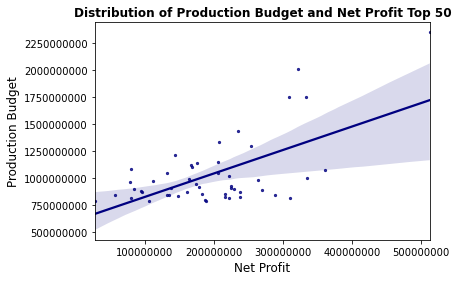

In [37]:
# Data model to determine the budget is for the most sucessful movies
# I chose to use a regplot because it can help predict the profit based on budget
# Only used top 50 net profit movies so I can show a closer look what the budget range is only for the most sucessful
# I also included a regplot for the top 200 movies so the client can also see what the predicted profits would be for
# a lower budget movie

sns.regplot(x="adjusted_production_budget", y="net_profit", data=df_net_profit.head(50), scatter_kws={'s':5},
            color='navy')
plt.xlabel("Net Profit", size=12)
plt.ylabel("Production Budget", size=12)
plt.title("Distribution of Production Budget and Net Profit Top 50", weight='bold', size=12)
plt.ticklabel_format(style='plain')

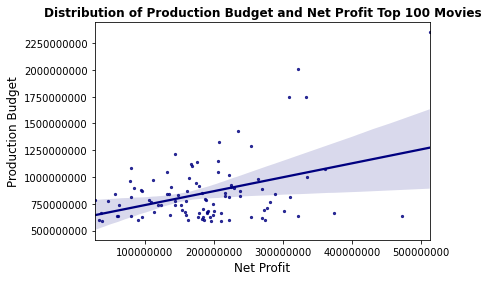

In [38]:
# when including more data the line of regretion shows a lower prediction for net profit 
# this plot helps show there are more characterists to making a sucesful movie than just budget
sns.regplot(x="adjusted_production_budget", y="net_profit", data=df_net_profit.head(100), scatter_kws={'s':5},
            color='navy')
plt.xlabel("Net Profit", size=12)
plt.ylabel("Production Budget", size=12)
plt.title("Distribution of Production Budget and Net Profit Top 100 Movies", weight='bold', size=12)
plt.ticklabel_format(style='plain')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

This analysis used net profit as the messurement of a sucessful movie, After evaluating net profits to runtime, release month, and run time this analysis has lead to three recommendations: 
- The movie should last approximently 120 minutes
- The movie should be released in between May and June
- There is a positive linear regression with production budget and net profits amoung the top movies and it is expect the higher budget the higher the net profit will be. 

Other analysis that could be investigated that would further answer the buisness problem data modeling of movie genres. An analysis on genre can show insight on if specific genres lead to higher net profit movies. As well an investigation into if hiring famous actresses and actors impacts the new profits of a movie. 

The analysis completed could be further improved by looking deeper into the production budget. Further analysis into budget will allow the client to get more detailed advice which will help guarantee their movies success. For example, budget put towards special effects or marketing might have a greater impact than the budget spent on the talent/actors and this aspects would be a good starting point for further investigation.
***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***